<a href="https://colab.research.google.com/github/fiza-azam/Image-Processing-Experiments/blob/main/Image_Manipulation_using_Pillow_and_OpenCv_Libraries_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Manipulating Images using PIL Library

If you want to reassign an array to another variable, you should use the copy method.

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
def plotFig(img):
  plt.figure(figsize=(5,5))
  plt.imshow(img)
  plt.show()

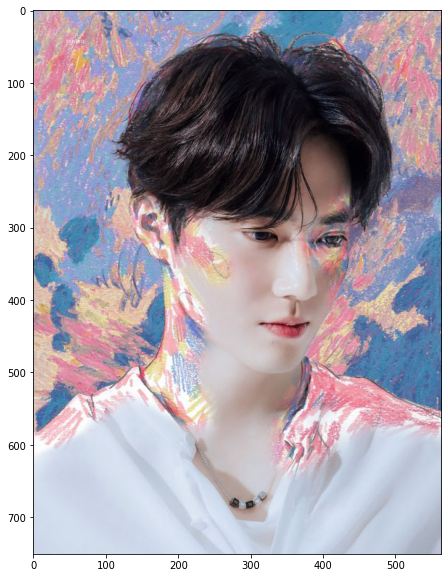

In [17]:
suho = np.array(Image.open('/content/drive/MyDrive/CV images/Suho2.jpg'))
plt.figure(figsize=(10,10))
plt.imshow(suho)
plt.show()

In [18]:
suho2 = suho.copy()
id(suho) == id(suho2)

False

<h1> Flipping Image </h1>

In [19]:
array = np.array(suho)
width, height, C = array.shape
print('width, height, C', width, height, C)

width, height, C 751 564 3


In [20]:
from PIL import ImageOps

In [28]:
img =Image.open('/content/drive/MyDrive/CV images/Suho2.jpg')

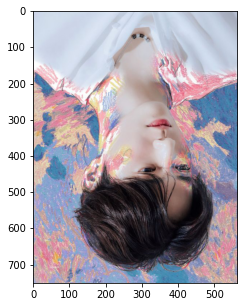

In [30]:
im_flip = ImageOps.flip(img)
plotFig(im_flip)

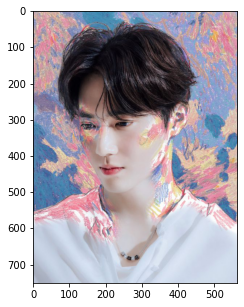

In [34]:
im_mirror = ImageOps.mirror(img)
plotFig(im_mirror)

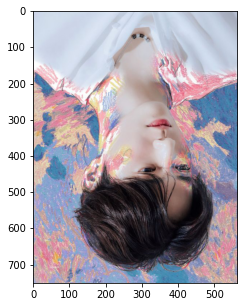

In [35]:
im_flip = img.transpose(1)
plotFig(im_flip)

The Image module has built-in attributes that describe the type of flip. The values are just integers. Several are shown in the following dict:

In [36]:
flip = {"FLIP_LEFT_RIGHT": Image.FLIP_LEFT_RIGHT,
        "FLIP_TOP_BOTTOM": Image.FLIP_TOP_BOTTOM,
        "ROTATE_90": Image.ROTATE_90,
        "ROTATE_180": Image.ROTATE_180,
        "ROTATE_270": Image.ROTATE_270,
        "TRANSPOSE": Image.TRANSPOSE, 
        "TRANSVERSE": Image.TRANSVERSE}

In [37]:
flip["ROTATE_90"]

2

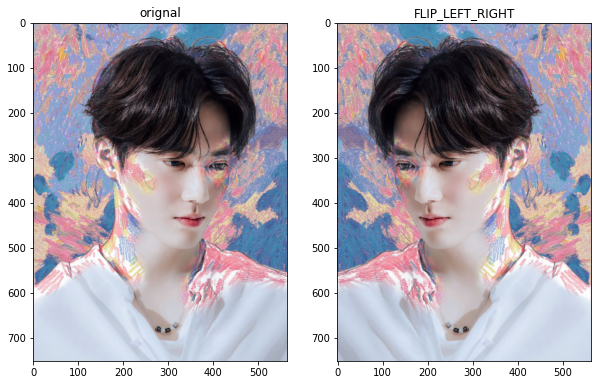

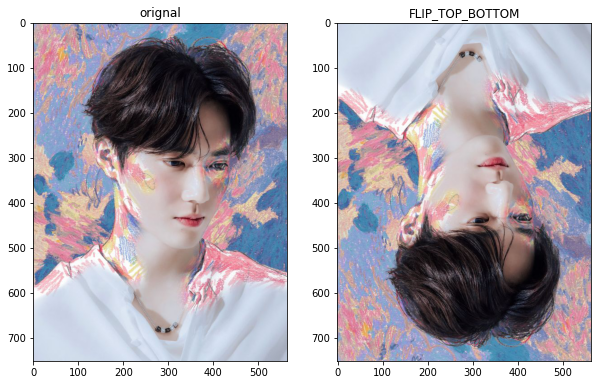

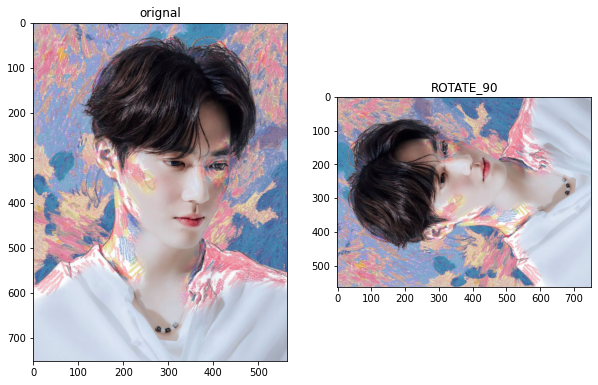

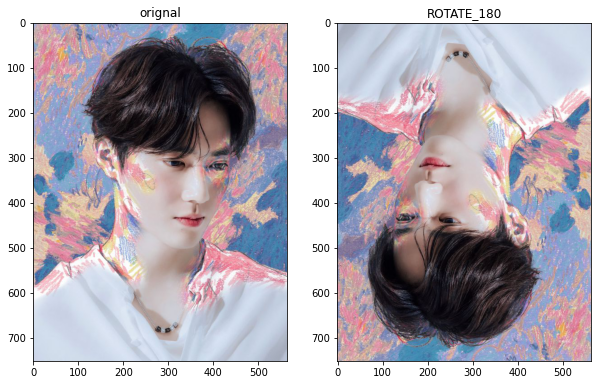

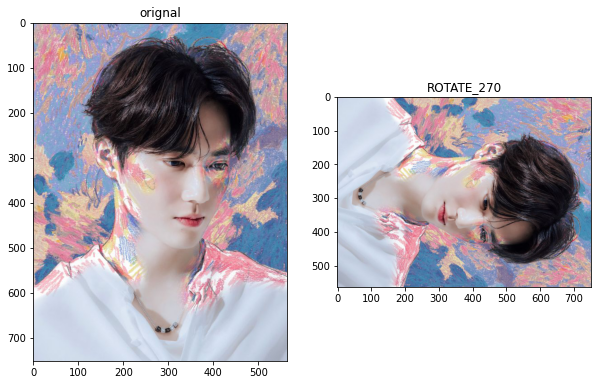

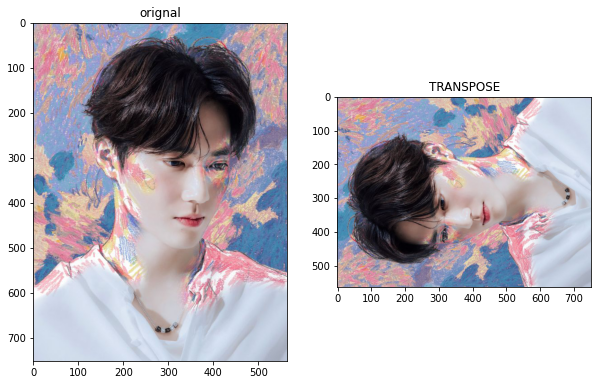

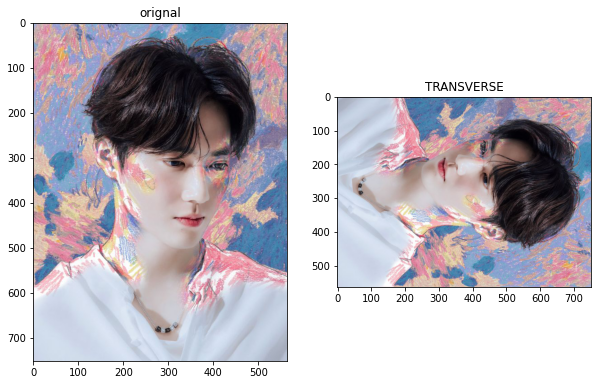

In [39]:
for key, values in flip.items():
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(img.transpose(values))
    plt.title(key)
    plt.show()

<h1> Cropping The Image <h1>

Let start with a vertical crop: the variable upper is the index of the first row that we would like to include in the image, the variable lower is the index of the last row we would like to include. We then perform array slicing to obtain the new image.

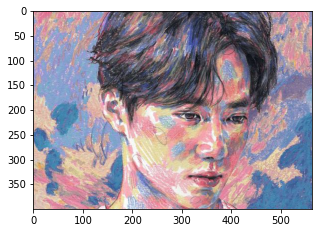

In [44]:
upper = 100
lower = 500
crop_top = array[upper: lower,:,:]
plotFig(crop_top)

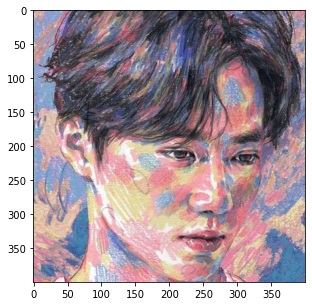

In [46]:
left = 100
right = 500
crop_horizontal = crop_top[: ,left:right,:]
plotFig(crop_horizontal)

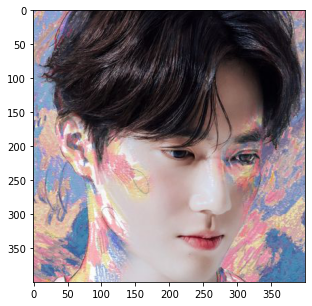

In [48]:
#Cropping using PIL Crop
image = Image.open('/content/drive/MyDrive/CV images/Suho2.jpg')
crop_image = image.crop((left, upper, right, lower))
plotFig(crop_image)

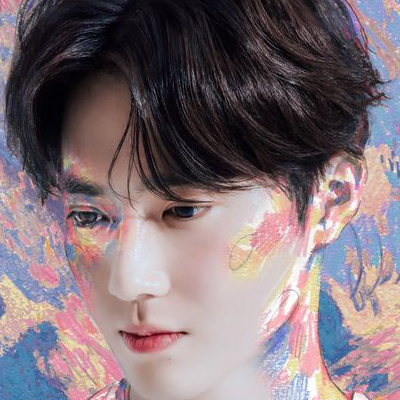

In [49]:
crop_image = crop_image.transpose(Image.FLIP_LEFT_RIGHT)
crop_image

<h1>Changing Specific Image Pixels<h1>

We can change specific image pixels using array indexing; for example, we can set all the green and blue channels in the original image we cropped to zero:

In [50]:
array_sq = np.copy(array)
array_sq[upper:lower, left:right, 1:2] = 0

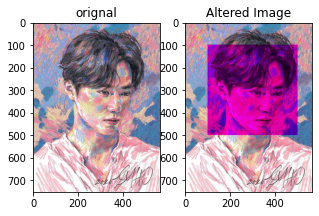

In [51]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.imshow(array)
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(array_sq)
plt.title("Altered Image")
plt.show()

We can also use the ImageDraw module from PIL library, which provides simple 2D graphics for Image objects

In [52]:
from PIL import ImageDraw 

In [53]:
image_draw = img.copy()

The draw constructor creates an object that can be used to draw in the given image. The input im is the image we would like to draw in.

In [54]:
image_fn = ImageDraw.Draw(im=image_draw)

We can draw a rectangle using the rectangle function, two important parameters include: xy – the coordinates bounding box and fill – Color of the rectangle.

In [56]:
shape = [left, upper, right, lower] 
image_fn.rectangle(xy=shape,fill="pink")

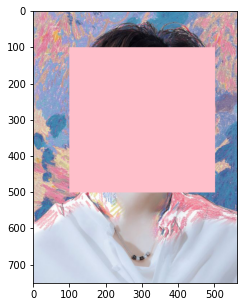

In [57]:
plotFig(image_draw)

Overlay Text

In [ ]:
from PIL import ImageFont

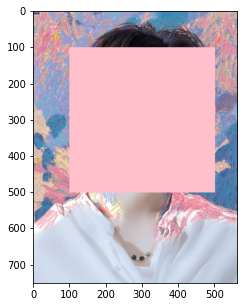

In [59]:
image_fn.text(xy=(0,0),text="box",fill=(0,0,0))
plotFig(image_draw)

We can overlay or paste one image over another by reassigning the pixel for one array to the next. Consider the following image array:

In [61]:
suho = Image.open("/content/drive/MyDrive/CV images/Suho2.jpg")
array = np.array(suho)

In [62]:
suho2 = Image.open("/content/drive/MyDrive/CV images/Suho1.jpg")
array2 = np.array(suho2)

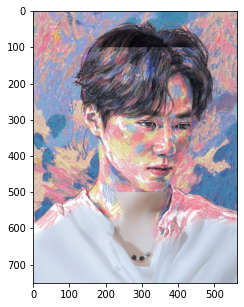

In [63]:
array[upper:lower,left:right,:]=array2[upper:lower,left:right,:]
plotFig(array)

In the same manner, the paste() method allows you to overlay one image over another, with the input being the image you would like to overlay. The parameter box is the left and upper coordinate of the image:

In [64]:
#pasting image on another using paste method og PIL
suho.paste(crop_image, box=(left,upper))

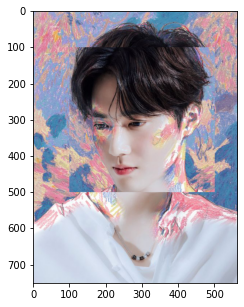

In [65]:
plotFig(suho)

#Manipulating Images using OpenCV

In [67]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [68]:
suho = cv2.imread("/content/drive/MyDrive/CV images/Suho2.jpg")

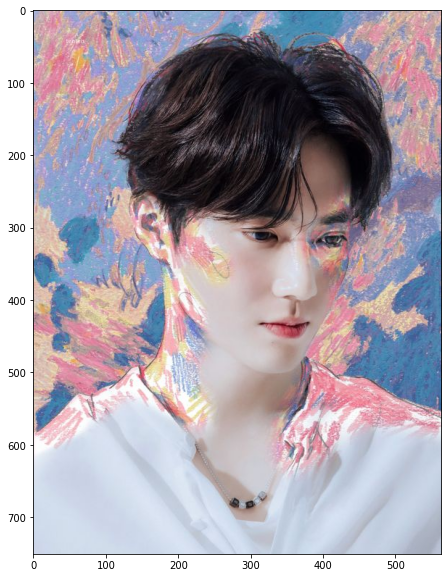

In [71]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(suho, cv2.COLOR_BGR2RGB))
plt.show()

In [72]:
B = suho.copy()
id(B)==id(suho)

False

<h1> Flipping Images </h1>

In [73]:
width, height,C=suho.shape
print('width, height,C',width, height,C)

width, height,C 751 564 3


OpenCVhas several ways to flip an image, we can use the flip() function; we have the input image array. The parameter is the flipCode

is the value indicating what kind of flip we would like to perform;

- flipcode = 0: flip vertically around the x-axis
- flipcode > 0: flip horizontally around y-axis positive value
- flipcode< 0: flip vertically and horizontally, <br>

flipping around both axes negative value
Let apply different flipcode's in a loop:

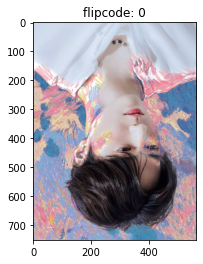

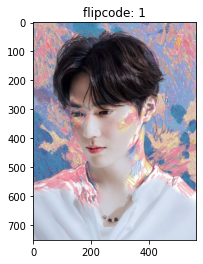

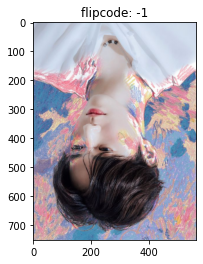

In [74]:
for flipcode in [0,1,-1]:
    im_flip =  cv2.flip(suho,flipcode )
    plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
    plt.title("flipcode: "+str(flipcode))
    plt.show()

We can also use the rotate() function. The parameter is an integer indicating what kind of flip we would like to perform.

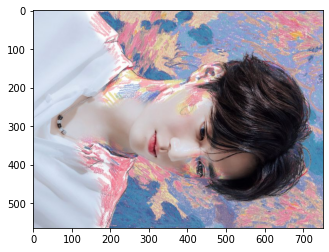

In [81]:
im_flip = cv2.rotate(suho,0)
plt.imshow(cv2.cvtColor(im_flip,cv2.COLOR_BGR2RGB))
plt.show()

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following dict:

In [82]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

In [83]:
flip["ROTATE_90_CLOCKWISE"]

0

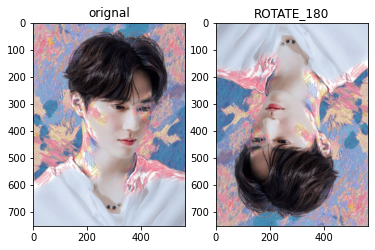

In [85]:
for key, value in flip.items():
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(suho, cv2.COLOR_BGR2RGB))
    plt.title("orignal")
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cv2.rotate(suho,value), cv2.COLOR_BGR2RGB))
    plt.title(key)
    plt.show()

<h1>Cropping an Image <h1>

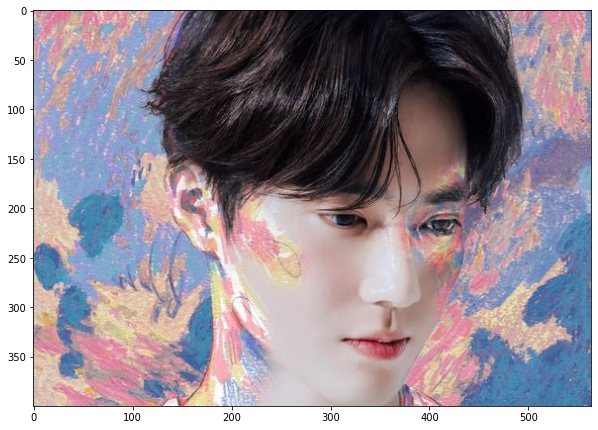

In [86]:
crop_top = suho[upper: lower,:,:]
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
plt.show()

In [87]:
crop_horizontal = crop_top[: ,left:right,:]
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB))
plt.show()

<h1>Changing Specific Image Pixels<h1>

We can change specific image pixels using array indexing; for example, we can set all the channels in the original image we cropped to zero :


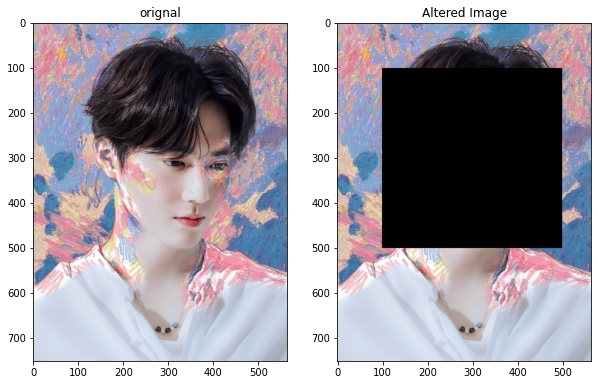

In [88]:
array_sq = np.copy(suho)
array_sq[upper:lower,left:right,:] = 0

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(suho,cv2.COLOR_BGR2RGB))
plt.title("orignal")
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(array_sq,cv2.COLOR_BGR2RGB))
plt.title("Altered Image")
plt.show()

We can also create shapes and OpenCV, we can use the method rectangle. The parameter pt1 is the top-left coordinate of the rectangle: (left,top) or  (𝑥_0,𝑦_0) , pt2 is the bottom right coordinate(right,lower) or  (𝑥_1,𝑦_1) . The parameter color is a tuple representing the intensity of each channel ( blue, green, red). Finally, we have the line thickness.

In [89]:
start_point, end_point = (left, upper),(right, lower)
image_draw = np.copy(image)
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) 
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB))
plt.show()

We can overlay text on an image using the function putText with the following parameter values:

- img: Image array
- text: Text string to be overlayed
- org: Bottom-left corner of the text string in the image
- fontFace: tye type of font
- fontScale: Font scale
- color: Text color
- thickness: Thickness of the lines used to draw a text
- lineType: Line type

In [94]:
suho2 = cv2.imread("/content/drive/MyDrive/CV images/Suho2.jpg")
#test = suho2.copy()

In [99]:
image_draw=cv2.putText(img=suho2,text='Suho',org=(80,700),color=(255,255,255),fontFace=4,fontScale=5,thickness=2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image_draw,cv2.COLOR_BGR2RGB))
plt.show()